<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.079314,54.594420,105.693973,216.367707,79.770333,136.597374
1,0.0,1.0,49.859389,82.835115,64.378324,207.072829,159.212091,47.860738
2,0.0,2.0,98.265900,46.792142,-327.648101,-172.590058,3.100414,-175.690472
3,0.0,3.0,49.439991,44.576999,-86.821075,17.195916,46.757870,-29.561954
4,0.0,4.0,70.486841,72.729821,-522.108691,-368.892029,108.189929,-477.081959
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.450181,22.660387,57.480109,121.590678,50.664230,70.926448
59996,999.0,56.0,52.151736,70.064272,-51.637399,80.578609,179.352069,-98.773460
59997,999.0,57.0,79.379301,78.802270,-37.460261,130.721310,142.224157,-11.502847
59998,999.0,58.0,73.663744,55.040037,-629.966731,-491.262950,65.600761,-556.863711


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.079314,54.594420,105.693973,216.367707,79.770333,136.597374
1,0.0,1.0,49.859389,82.835115,64.378324,207.072829,159.212091,47.860738
2,0.0,2.0,98.265900,46.792142,-327.648101,-172.590058,3.100414,-175.690472
3,0.0,3.0,49.439991,44.576999,-86.821075,17.195916,46.757870,-29.561954
4,0.0,4.0,70.486841,72.729821,-522.108691,-368.892029,108.189929,-477.081959
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.450181,22.660387,57.480109,121.590678,50.664230,70.926448
59996,999.0,56.0,52.151736,70.064272,-51.637399,80.578609,179.352069,-98.773460
59997,999.0,57.0,79.379301,78.802270,-37.460261,130.721310,142.224157,-11.502847
59998,999.0,58.0,73.663744,55.040037,-629.966731,-491.262950,65.600761,-556.863711


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    46.079314  54.594420  105.693973  216.367707   79.770333   
      1.0    49.859389  82.835115   64.378324  207.072829  159.212091   
      2.0    98.265900  46.792142 -327.648101 -172.590058    3.100414   
      3.0    49.439991  44.576999  -86.821075   17.195916   46.757870   
      4.0    70.486841  72.729821 -522.108691 -368.892029  108.189929   
...                ...        ...         ...         ...         ...   
999.0 55.0   31.450181  22.660387   57.480109  121.590678   50.664230   
      56.0   52.151736  70.064272  -51.637399   80.578609  179.352069   
      57.0   79.379301  78.802270  -37.460261  130.721310  142.224157   
      58.0   73.663744  55.040037 -629.966731 -491.262950   65.600761   
      59.0   57.937166  22.311148 -142.333082  -52.084768  -19.522440   

                  e_hat  
rep   index              
0.0   0.0    136.597374  
      1.0     47.860738  
      2.0   -175.690472  
      3.0    -29.561954  
      4.0   -477.081959  
...                 ...  
999.0 55.0    70.926448  
      56.0   -98.773460  
      57.0   -11.502847  
      58.0  -556.863711  
      59.0   -32.562328  

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    46.079314  54.594420  105.693973  216.367707   79.770333   
      1.0    49.859389  82.835115   64.378324  207.072829  159.212091   
      2.0    98.265900  46.792142 -327.648101 -172.590058    3.100414   
      3.0    49.439991  44.576999  -86.821075   17.195916   46.757870   
      4.0    70.486841  72.729821 -522.108691 -368.892029  108.189929   
...                ...        ...         ...         ...         ...   
999.0 55.0   31.450181  22.660387   57.480109  121.590678   50.664230   
      56.0   52.151736  70.064272  -51.637399   80.578609  179.352069   
      57.0   79.379301  78.802270  -37.460261  130.721310  142.224157   
      58.0   73.663744  55.040037 -629.966731 -491.262950   65.600761   
      59.0   57.937166  22.311148 -142.333082  -52.084768  -19.522440   

                  e_hat  
rep   index              
0.0   0.0    136.597374  
      1.0     47.860738  
      2.0   -175.690472  
      3.0    -29.561954  
      4.0   -477.081959  
...                 ...  
999.0 55.0    70.926448  
      56.0   -98.773460  
      57.0   -11.502847  
      58.0  -556.863711  
      59.0   -32.562328  

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.079314,54.594420,105.693973,216.367707,79.770333,136.597374
1,0.0,1.0,49.859389,82.835115,64.378324,207.072829,159.212091,47.860738
2,0.0,2.0,98.265900,46.792142,-327.648101,-172.590058,3.100414,-175.690472
3,0.0,3.0,49.439991,44.576999,-86.821075,17.195916,46.757870,-29.561954
4,0.0,4.0,70.486841,72.729821,-522.108691,-368.892029,108.189929,-477.081959
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.450181,22.660387,57.480109,121.590678,50.664230,70.926448
59996,999.0,56.0,52.151736,70.064272,-51.637399,80.578609,179.352069,-98.773460
59997,999.0,57.0,79.379301,78.802270,-37.460261,130.721310,142.224157,-11.502847
59998,999.0,58.0,73.663744,55.040037,-629.966731,-491.262950,65.600761,-556.863711


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    46.079314  54.594420  105.693973  216.367707   79.770333   
      1.0    49.859389  82.835115   64.378324  207.072829  159.212091   
      2.0    98.265900  46.792142 -327.648101 -172.590058    3.100414   
      3.0    49.439991  44.576999  -86.821075   17.195916   46.757870   
      4.0    70.486841  72.729821 -522.108691 -368.892029  108.189929   
...                ...        ...         ...         ...         ...   
999.0 55.0   31.450181  22.660387   57.480109  121.590678   50.664230   
      56.0   52.151736  70.064272  -51.637399   80.578609  179.352069   
      57.0   79.379301  78.802270  -37.460261  130.721310  142.224157   
      58.0   73.663744  55.040037 -629.966731 -491.262950   65.600761   
      59.0   57.937166  22.311148 -142.333082  -52.084768  -19.522440   

                  e_hat  
rep   index              
0.0   0.0    136.597374  
      1.0     47.860738  
      2.0   -175.690472  
      3.0    -29.561954  
      4.0   -477.081959  
...                 ...  
999.0 55.0    70.926448  
      56.0   -98.773460  
      57.0   -11.502847  
      58.0  -556.863711  
      59.0   -32.562328  

[60000 rows x 6 columns]

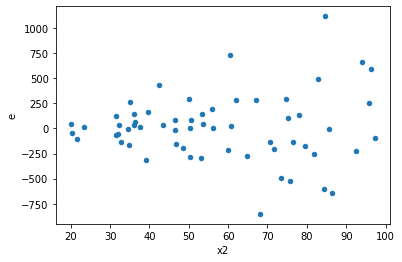

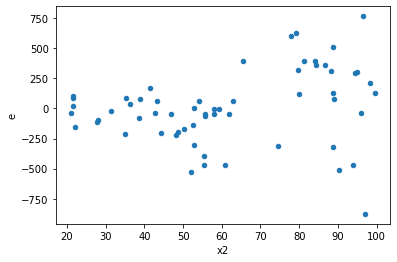

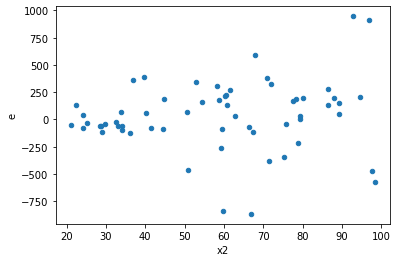

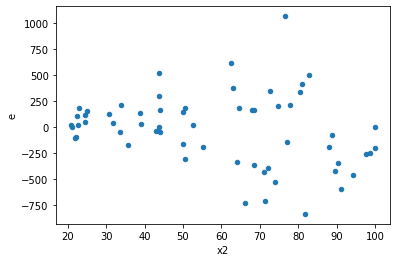

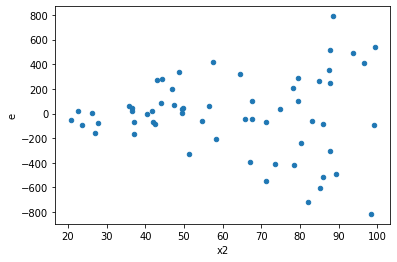

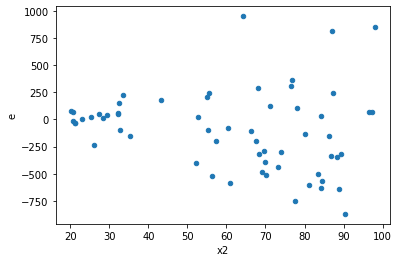

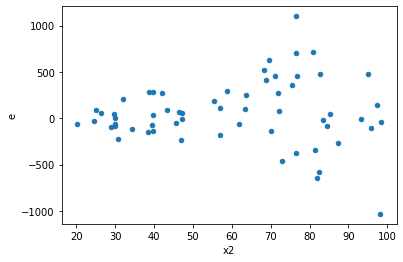

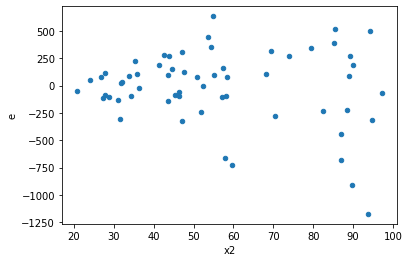

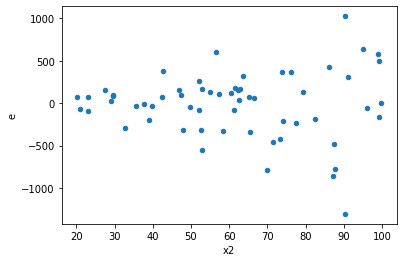

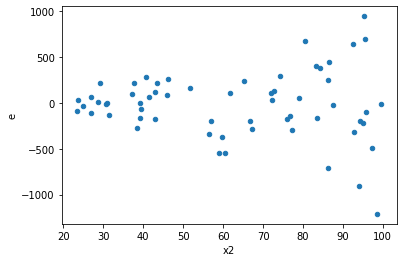

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,715999.5431068196,2092277.5589906648,32545.43377758271,95103.52540866658,2.9221772264155184,0.015053915015851294,0.9924730424920744,0.007526957507925647,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,488916.04193294223,5274147.720450456,22223.456451497375,239733.98729320255,10.787430290892024,5.155302822412722e-07,0.9999997422348589,2.577651411206361e-07,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,833586.8710534656,3658287.5873195734,37890.31232061207,166285.79942361696,4.388609891007908,0.000996697203450081,0.999501651398275,0.0004983486017250405,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,651602.4973635403,2594418.3516974854,29618.295334706378,117928.10689534024,3.981596697671977,0.002003311098380811,0.9989983444508096,0.0010016555491904056,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,517334.38522549043,4613224.7622088855,23515.199328431383,209692.03464585842,8.917297774819511,2.940305088960926e-06,0.9999985298474555,1.470152544480463e-06,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,268093.15054594434,4306079.988478917,12186.052297542925,195730.9085672235,16.06187990894219,1.1396664945095836e-08,0.9999999943016675,5.698332472547918e-09,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,248352.67926417527,4054730.1670692447,11288.758148371604,184305.91668496566,16.326500600205673,9.705183545705154e-09,0.9999999951474082,4.852591772852577e-09,Reject005=0 : Heteroscedasticity
7.0,22.0,22.0,712294.4336241768,3953867.2235464337,32377.019710189852,179721.2374339288,5.550888841611511,0.0001653157870322719,0.9999173421064839,8.265789351613595e-05,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,376458.04116178094,2834094.716027568,17111.729143717315,128822.48709216219,7.52831499436515,1.3097250256777215e-05,0.9999934513748716,6.548625128388608e-06,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,715999.5431068196,2092277.5589906648,32545.43377758271,95103.52540866658,2.9221772264155184,0.015053915015851294,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,488916.04193294223,5274147.720450456,22223.456451497375,239733.98729320255,10.787430290892024,5.155302822412722e-07,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,833586.8710534656,3658287.5873195734,37890.31232061207,166285.79942361696,4.388609891007908,0.000996697203450081,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,651602.4973635403,2594418.3516974854,29618.295334706378,117928.10689534024,3.981596697671977,0.002003311098380811,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,517334.38522549043,4613224.7622088855,23515.199328431383,209692.03464585842,8.917297774819511,2.940305088960926e-06,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,268093.15054594434,4306079.988478917,12186.052297542925,195730.9085672235,16.06187990894219,1.1396664945095836e-08,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,248352.67926417527,4054730.1670692447,11288.758148371604,184305.91668496566,16.326500600205673,9.705183545705154e-09,Reject005=0 : Heteroscedasticity
7.0,22.0,22.0,712294.4336241768,3953867.2235464337,32377.019710189852,179721.2374339288,5.550888841611511,0.0001653157870322719,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,376458.04116178094,2834094.716027568,17111.729143717315,128822.48709216219,7.52831499436515,1.3097250256777215e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    994
Reject005=1 : Homoscedasticity        6
Name: Result_test, dtype: int64